In [6]:
# %%
import os
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
from librosa import *
from librosa.display import *
from librosa.feature import *

import sounddevice as sd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')



# smaran datapaths
data_dir = f"{os.environ['data1']}/_classification/MusicEmotions"

anot_dir = f"{data_dir}/annotations"
data_45_dir = f"{data_dir}/clips_45sec/clips_45seconds"
default_feature_dir = f"{data_dir}/default_features"



In [7]:
ls_dir=lambda x:f'{x}/'+np.array(os.listdir(x),dtype=np.object)
anots=ls_dir(anot_dir)
anots


array(['/media/smaran/Storage/_Datasets/_classification/MusicEmotions/annotations/arousal_cont_average.csv',
       '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/annotations/arousal_cont_std.csv',
       '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/annotations/songs_info.csv',
       '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/annotations/static_annotations.csv',
       '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/annotations/valence_cont_average.csv',
       '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/annotations/valence_cont_std.csv'],
      dtype=object)

In [8]:
anot_df=pd.read_csv(anots[0])
avg_valence=pd.read_csv(anots[-2])
anot_df

,song_id,sample_15000ms,sample_15500ms,sample_16000ms,sample_16500ms,sample_17000ms,sample_17500ms,sample_18000ms,sample_18500ms,sample_19000ms,...,sample_40500ms,sample_41000ms,sample_41500ms,sample_42000ms,sample_42500ms,sample_43000ms,sample_43500ms,sample_44000ms,sample_44500ms,sample_45000ms
0,2,-0.109388,-0.114943,-0.116414,-0.118614,-0.126458,-0.133200,-0.136857,-0.144714,-0.138987,...,-0.259550,-0.262237,-0.261481,-0.264916,-0.265397,-0.265162,-0.264470,-0.265842,-0.267091,-0.266345
1,3,-0.110847,-0.123974,-0.131104,-0.135957,-0.140777,-0.144664,-0.163118,-0.165218,-0.158859,...,-0.265929,-0.263960,-0.263571,-0.262956,-0.260337,-0.248710,-0.245516,-0.251299,-0.254619,-0.259586
2,4,0.222328,0.179448,0.178389,0.184057,0.176043,0.178720,0.176345,0.175793,0.176155,...,0.298644,0.294144,0.302703,0.297487,0.303424,0.298097,0.304340,0.304115,0.305079,0.290705
3,5,-0.255613,-0.251578,-0.251957,-0.251123,-0.250762,-0.251957,-0.251957,-0.251957,-0.251957,...,-0.225898,-0.228913,-0.228913,-0.228913,-0.228913,-0.227561,-0.227609,-0.229996,-0.243920,-0.246009
4,7,0.464233,0.460788,0.460990,0.461046,0.457239,0.465701,0.471808,0.469918,0.473376,...,0.333163,0.331243,0.333927,0.333740,0.340782,0.339002,0.339271,0.340961,0.342020,0.335976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,995,-0.083658,-0.079965,-0.080614,-0.077533,-0.081066,-0.082564,-0.075276,-0.071917,-0.072352,...,-0.046469,-0.044649,-0.041990,-0.035563,-0.037822,-0.040367,-0.043850,-0.049861,-0.046132,-0.051784
740,996,0.340385,0.339627,0.340270,0.335955,0.338222,0.335331,0.340030,0.343517,0.347987,...,0.364017,0.366737,0.366231,0.366730,0.365032,0.366610,0.367975,0.370551,0.369909,0.368717
741,997,0.367088,0.368839,0.352861,0.311679,0.278800,0.253148,0.249393,0.243813,0.238716,...,0.257732,0.293368,0.312197,0.327872,0.337830,0.332809,0.332175,0.337198,0.353745,0.353280
742,999,-0.176851,-0.173603,-0.179410,-0.171693,-0.167945,-0.162917,-0.163924,-0.164752,-0.168172,...,-0.156017,-0.155395,-0.158082,-0.158439,-0.154866,-0.155621,-0.155486,-0.161148,-0.151226,-0.152174


In [15]:
(anot_df.song_id==132).any()


False

In [9]:
sample=anot_df.iloc[1];print(sample)
song_id,arousal=int(sample[0]),sample[1:]


song_id           3.000000
sample_15000ms   -0.110847
sample_15500ms   -0.123974
sample_16000ms   -0.131104
sample_16500ms   -0.135957
                    ...   
sample_43000ms   -0.248710
sample_43500ms   -0.245516
sample_44000ms   -0.251299
sample_44500ms   -0.254619
sample_45000ms   -0.259586
Name: 1, Length: 62, dtype: float64


In [10]:
import re
pat=r'.*/(\d+).mp3'
clips_45=list(sorted(ls_dir(f'{data_45_dir}/train'),key=lambda x:int(re.match(pat,x).group(1))));clips_45


['/media/smaran/Storage/_Datasets/_classification/MusicEmotions/clips_45sec/clips_45seconds/train/1.mp3',
 '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/clips_45sec/clips_45seconds/train/2.mp3',
 '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/clips_45sec/clips_45seconds/train/3.mp3',
 '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/clips_45sec/clips_45seconds/train/4.mp3',
 '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/clips_45sec/clips_45seconds/train/5.mp3',
 '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/clips_45sec/clips_45seconds/train/6.mp3',
 '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/clips_45sec/clips_45seconds/train/7.mp3',
 '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/clips_45sec/clips_45seconds/train/8.mp3',
 '/media/smaran/Storage/_Datasets/_classification/MusicEmotions/clips_45sec/clips_45seconds/train/9.mp3',
 '/media/smaran/Storage/_Datasets/_classificat

In [11]:
clip=clips_45[song_id]
s,f=load(clip)
s.shape,f

((993600,), 22050)

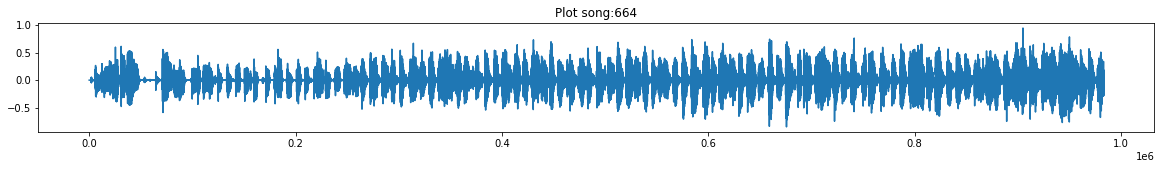

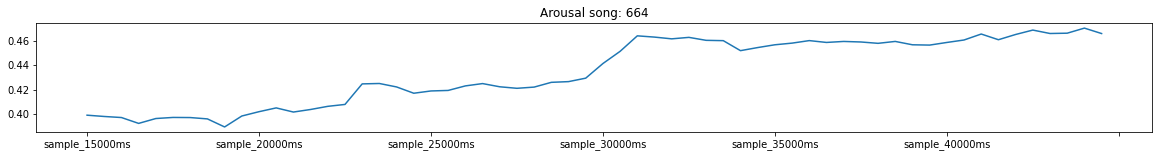

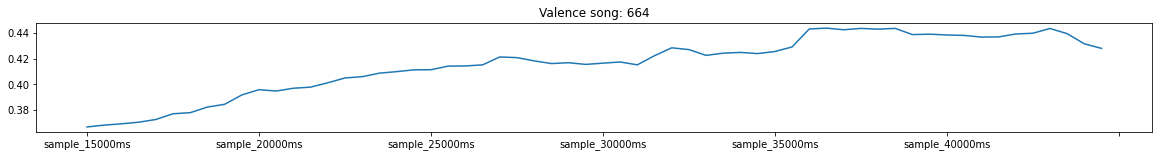

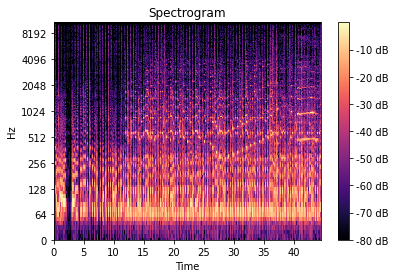

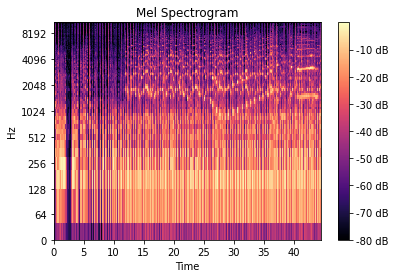

In [12]:
sample=anot_df.iloc[np.random.randint(0,len(clips_45)-4)]
song_id,arousal=int(sample[0]),sample[1:]
valence=avg_valence[avg_valence.song_id==song_id].iloc[0][1:]
clip=clips_45[song_id]
s,f=load(clip)
st=0
ed=-1
s=s[int(f*st/2):int(f*ed/2)]
arousal=arousal[st:ed]
valence=valence[st:ed]

figure(figsize=(20,2))
title(f"Plot song:{song_id}")
plot(s)
show()
figure(figsize=(20,2))
title(f"Arousal song: {song_id}")

arousal.plot()
show()
figure(figsize=(20,2))
title(f"Valence song: {song_id}")

valence.plot()
show()
spec=stft(s,hop_length=512)
spec = amplitude_to_db(spec, ref=np.max)
specshow(spec, sr=f, x_axis='time', y_axis='log');
colorbar(format='%+2.0f dB');
title('Spectrogram');
show()

spec = np.abs(melspectrogram(s, hop_length=512))
spec = power_to_db(spec, ref=np.max)
specshow(spec, sr=f, x_axis='time', y_axis='log');
colorbar(format='%+2.0f dB');
title('Mel Spectrogram');

sd.play(s,f)



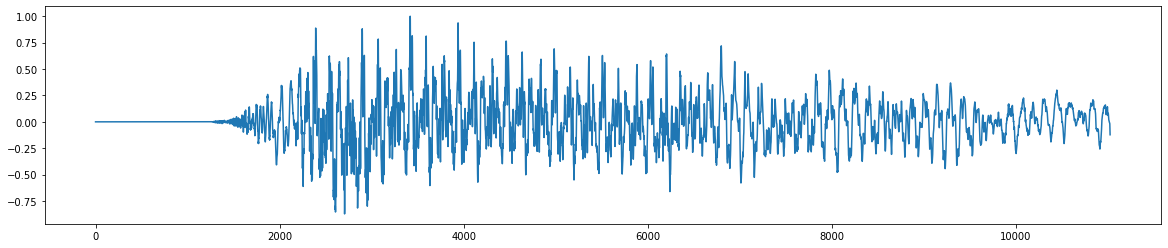

NameError: name 'spec_' is not defined

In [13]:
clip=clips_45[np.random.randint(1,700)]
ss_,f=load(clip)
l=1
st=np.random.randint(0,43)
st=0
ed=st+l
s=ss_[int(f*st/2):int(f*ed/2)]
a=arousal[st:ed].values.mean()
v=valence[st:ed].values.mean()
sp=np.random.randint(0,10)
# sp=0
for i in range(sp):
    st=np.random.randint(0,43)
    ed=st+l
    s_=ss_[int(f*st/2):int(f*ed/2)]
    a_=arousal[st:ed].values.mean()
    v_=valence[st:ed].values.mean()

    figure(figsize=(20,4))
    plot(s)
    show()
    figure(figsize=(20,4))

    plot(s_)


    show()
    spec = np.abs(melspectrogram(s_, hop_length=1024))
    # spec = power_to_db(spec_, ref=np.max)
    spec/=np.linalg.norm(spec) 
    specshow(spec, sr=f, x_axis='time', y_axis='log')
    colorbar(format='%+2.0000000f ')
    title('Mel Spectrogram')
    show()
    print(a_,v_,spec.shape)


    s+=ss_[int(f*st/2):int(f*ed/2)]
    a=a*.5+v_*.5
    v=v*.5+v_*.5

s/=s.max()
figure(figsize=(20,4))
plot(s)

show()
spec = np.abs(melspectrogram(s, hop_length=1024))
spec = power_to_db(spec_, ref=np.max)
spec/=np.linalg.norm(spec) 
specshow(spec, sr=f, x_axis='time', y_axis='log')
colorbar(format='%+2.0000000f ')
title('Mel Spectrogram')


sd.play(s,f)
a,v,spec.shape,sp

In [ ]:
sd.play(abs(s))

In [ ]:
sd.stop()

In [ ]:
_s=np.array_split(ss_,45*2)
step=len(_s[0])*2;step


[array([ 0.        ,  0.        ,  0.        , ...,  0.17189382,
         0.04313851, -0.02319528], dtype=float32),
 array([ 0.00087242,  0.06099408,  0.3836692 , ..., -0.08120451,
        -0.00201488,  0.04277697], dtype=float32),
 array([ 0.00510182,  0.04552861, -0.04465896, ...,  0.4930546 ,
         0.49296185,  0.51605785], dtype=float32),
 array([0.55395114, 0.51315147, 0.48035198, ..., 0.11049934, 0.07670552,
        0.02823448], dtype=float32),
 array([0.05148321, 0.03021329, 0.0008233 , ..., 0.0813835 , 0.03554836,
        0.01621585], dtype=float32),
 array([ 0.22806631, -0.07594683,  0.10695462, ...,  0.01752927,
         0.07659912, -0.11220129], dtype=float32),
 array([ 0.13325605,  0.0507745 , -0.1673993 , ...,  0.00652606,
         0.00244762,  0.02035528], dtype=float32),
 array([0.02849966, 0.01923098, 0.00829268, ..., 0.18818708, 0.16497867,
        0.21243617], dtype=float32),
 array([0.20847064, 0.22464463, 0.22383876, ..., 0.18551058, 0.16262375,
        0.2479345

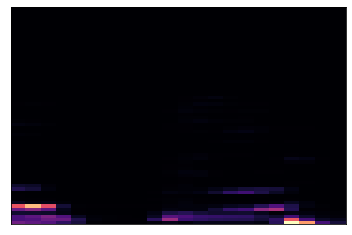

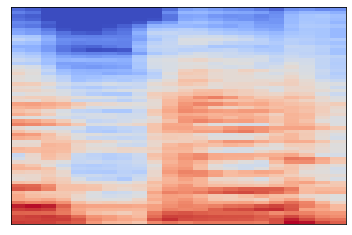

[ 0.          0.          0.         ... -0.17311375 -0.1127129
 -0.13772824]
[-0.11541048 -0.14977604 -0.15624091 ...  0.21911065  0.22713147
  0.27945566]
[0.30615008 0.27713487 0.2549703  ... 0.35536247 0.42688257 0.47181216]
[ 0.47244045  0.40360525  0.27922016 ... -0.22942424 -0.19752523
 -0.19529936]
[-0.22000857 -0.16257067 -0.168514   ...  0.15525486  0.12146466
  0.08713369]
[ 0.06403209  0.04683738  0.00193374 ... -0.17059463 -0.18232048
 -0.17040907]
[-0.16869639 -0.18296556 -0.16382925 ...  0.03924979  0.01544528
  0.00985034]
[0.02560375 0.0733556  0.12455633 ... 0.10778031 0.07150316 0.03883497]
[0.02108999 0.02752918 0.01307245 ... 0.5256348  0.55340743 0.54830647]
[ 0.53292984  0.5105696   0.46269888 ... -0.05579608 -0.05961133
  0.00212759]
[0.05140001 0.0910781  0.15011762 ... 0.03985881 0.04057583 0.02302276]
[ 0.02186845  0.03050288  0.01438699 ... -0.32301587 -0.31730148
 -0.2806578 ]
[-0.24379537 -0.23722309 -0.24684758 ... -0.34311047 -0.307469
 -0.31180462]
[-0.

array([array([ 0.        ,  0.        ,  0.        , ..., -0.17311375,
              -0.1127129 , -0.13772824], dtype=float32)               ,
       array([-0.11541048, -0.14977604, -0.15624091, ...,  0.21911065,
               0.22713147,  0.27945566], dtype=float32)               ,
       array([0.30615008, 0.27713487, 0.2549703 , ..., 0.35536247, 0.42688257,
              0.47181216], dtype=float32)                                     ,
       array([ 0.47244045,  0.40360525,  0.27922016, ..., -0.22942424,
              -0.19752523, -0.19529936], dtype=float32)               ,
       array([-0.22000857, -0.16257067, -0.168514  , ...,  0.15525486,
               0.12146466,  0.08713369], dtype=float32)               ,
       array([ 0.06403209,  0.04683738,  0.00193374, ..., -0.17059463,
              -0.18232048, -0.17040907], dtype=float32)               ,
       array([-0.16869639, -0.18296556, -0.16382925, ...,  0.03924979,
               0.01544528,  0.00985034], dtype=float32)

In [ ]:
clip=clips_45[3]
ss_,f=load(clip)
ss_=ss_[:22050*45-1]
_s=np.array(np.array_split(ss_,45*2))
step=len(_s[0])*2

specs=np.frompyfunc(lambda x:melspectrogram(x,hop_length=512,n_mels=64),1,1)(_s)
specs=np.stack(specs)
a=np.random.randint(0,89)
spec=specs[a]
specshow(spec)
show()
spec=power_to_db(spec)
spec=spec/np.linalg.norm(spec)
specshow(spec)
show()
a,spec,spec.shape
_s.shape
np.frompyfunc(lambda x:print(x),1,1)(_s)
np.block(_s)
_s

In [ ]:
_s

[array([ 0.        ,  0.        ,  0.        , ...,  0.17189382,
         0.04313851, -0.02319528], dtype=float32),
 array([ 0.00087242,  0.06099408,  0.3836692 , ..., -0.08120451,
        -0.00201488,  0.04277697], dtype=float32),
 array([ 0.00510182,  0.04552861, -0.04465896, ...,  0.4930546 ,
         0.49296185,  0.51605785], dtype=float32),
 array([0.55395114, 0.51315147, 0.48035198, ..., 0.11049934, 0.07670552,
        0.02823448], dtype=float32),
 array([0.05148321, 0.03021329, 0.0008233 , ..., 0.0813835 , 0.03554836,
        0.01621585], dtype=float32),
 array([ 0.22806631, -0.07594683,  0.10695462, ...,  0.01752927,
         0.07659912, -0.11220129], dtype=float32),
 array([ 0.13325605,  0.0507745 , -0.1673993 , ...,  0.00652606,
         0.00244762,  0.02035528], dtype=float32),
 array([0.02849966, 0.01923098, 0.00829268, ..., 0.18818708, 0.16497867,
        0.21243617], dtype=float32),
 array([0.20847064, 0.22464463, 0.22383876, ..., 0.18551058, 0.16262375,
        0.2479345

In [ ]:
sample=anot_df.iloc[np.random.randint(0,len(clips_45)-4)]
song_id,arousal=int(sample[0]),sample[1:]
valence=avg_valence[avg_valence.song_id==song_id].iloc[0][1:]
avg_valence[avg_valence.song_id==song_id].iloc[0]

song_id           693.000000
sample_15000ms      0.215522
sample_15500ms      0.213361
sample_16000ms      0.203722
sample_16500ms      0.195051
                     ...    
sample_43000ms     -0.066480
sample_43500ms     -0.069335
sample_44000ms     -0.074386
sample_44500ms     -0.077613
sample_45000ms     -0.078081
Name: 536, Length: 62, dtype: float64

In [ ]:
aa=np.interp(np.arange(0,step*30,step),[-step,step*29],[0,arousal.values[0]])
aa=np.concatenate([aa,arousal.values[1:]])
np.vstack([aa,aa]).transpose()

array([[0.01407895, 0.01407895],
       [0.0281579 , 0.0281579 ],
       [0.04223685, 0.04223685],
       [0.0563158 , 0.0563158 ],
       [0.07039475, 0.07039475],
       [0.0844737 , 0.0844737 ],
       [0.09855265, 0.09855265],
       [0.1126316 , 0.1126316 ],
       [0.12671055, 0.12671055],
       [0.1407895 , 0.1407895 ],
       [0.15486845, 0.15486845],
       [0.1689474 , 0.1689474 ],
       [0.18302635, 0.18302635],
       [0.1971053 , 0.1971053 ],
       [0.21118425, 0.21118425],
       [0.2252632 , 0.2252632 ],
       [0.23934215, 0.23934215],
       [0.2534211 , 0.2534211 ],
       [0.26750005, 0.26750005],
       [0.281579  , 0.281579  ],
       [0.29565795, 0.29565795],
       [0.3097369 , 0.3097369 ],
       [0.32381585, 0.32381585],
       [0.3378948 , 0.3378948 ],
       [0.35197375, 0.35197375],
       [0.3660527 , 0.3660527 ],
       [0.38013165, 0.38013165],
       [0.3942106 , 0.3942106 ],
       [0.40828955, 0.40828955],
       [0.4223685 , 0.4223685 ],
       [0.

In [ ]:
[0,arousal.values[0]]

[0, 0.103447768459199]